In [52]:
#Importing packages, setting stemmer, vectorizer, lemmatizer
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import nltk.data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
lemmatizer=WordNetLemmatizer()
stemmer=SnowballStemmer("english")
vectorizer=TfidfVectorizer()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thors\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thors\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
#Assessing what preprocessing does
stop_words=set(stopwords.words("english"))
filtered_list=[]
tokens=word_tokenize("test for a good causes's test'sij")
tokens=[w for w in tokens if not w in stop_words]
tokens=[lemmatizer.lemmatize(x) for x in tokens]
tokens=[stemmer.stem(w) for w in tokens]
tokens

['test', 'good', 'caus', "'s", "test'sij"]

In [54]:
import sys
import tweepy

In [55]:
# Authentication for twitter api
consumerKey = 'x'
consumerSecret = 'x'
accessToken = 'x'
accessTokenSecret = 'x'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
bearer_token='x'
client=tweepy.Client(bearer_token)

In [56]:
#Searching for tweets and processing
search_query='from:CaucasianJames'
tweets = client.search_recent_tweets(search_query, max_results=20)

In [57]:
tweetlist=[]
for tweet in tweets.data:
    x=str(tweet).split(':')
    if x[0].find('RT')!= -1:
        del x[0]
    ''.join(x)
    tweetlist.append(x)
    

live=pd.DataFrame({'selected_text': tweetlist})

In [58]:
#Joining the api to the dataset as they need to run through the same vectorizer
df=pd.read_csv("C:/Users/thors/Downloads/Tweets.csv.zip")
#Dataset: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset 
df=pd.concat([live, df], ignore_index=True)

In [ ]:
#Data Preprocessing

In [59]:
df.head(5)

,selected_text,textID,text,sentiment
0,[@MrAnderson_13 yeah why not],NaN,NaN,NaN
1,"[out now let’s roll \n\nhttps, //t.co/LSsz7LvRDs]",NaN,NaN,NaN
2,[@guitaromantics ur welcome],NaN,NaN,NaN
3,[the caucasian james silly shirt collection dr...,NaN,NaN,NaN
4,[just another reminder that this is my summer],NaN,NaN,NaN


In [60]:
df=df.drop('textID', axis='columns')
df=df.drop('text', axis='columns')
df.head(5)

,selected_text,sentiment
0,[@MrAnderson_13 yeah why not],NaN
1,"[out now let’s roll \n\nhttps, //t.co/LSsz7LvRDs]",NaN
2,[@guitaromantics ur welcome],NaN
3,[the caucasian james silly shirt collection dr...,NaN
4,[just another reminder that this is my summer],NaN


In [61]:
df=df.replace("neutral", 0)
df=df.replace("negative", -1)
df=df.replace("positive", 1)


In [62]:
df['selected_text']=df.selected_text.apply(lambda x: word_tokenize(str(x)))
df.head(5)

,selected_text,sentiment
0,"[[, ', @, MrAnderson_13, yeah, why, not, ', ]]",NaN
1,"[[, 'out, now, let, ’, s, roll, \n\nhttps, ', ...",NaN
2,"[[, ', @, guitaromantics, ur, welcome, ', ]]",NaN
3,"[[, 'the, caucasian, james, silly, shirt, coll...",NaN
4,"[[, 'just, another, reminder, that, this, is, ...",NaN


In [63]:
punct=[':',',','`','.','!',';','?']
df['selected_text']=df.selected_text.apply(lambda tokens: [w for w in tokens if not w in stop_words])
df['selected_text']=df.selected_text.apply(lambda tokens: [w for w in tokens if not w in punct])
df.head(5)

,selected_text,sentiment
0,"[[, ', @, MrAnderson_13, yeah, ', ]]",NaN
1,"[[, 'out, let, ’, roll, \n\nhttps, ', '//t.co/...",NaN
2,"[[, ', @, guitaromantics, ur, welcome, ', ]]",NaN
3,"[[, 'the, caucasian, james, silly, shirt, coll...",NaN
4,"[[, 'just, another, reminder, summer, ', ]]",NaN


In [64]:
df['selected_text']=df.selected_text.apply(lambda tokens: [stemmer.stem(w) for w in tokens])
df.head(5)

,selected_text,sentiment
0,"[[, ', @, mranderson_13, yeah, ', ]]",NaN
1,"[[, out, let, ’, roll, \n\nhttps, ', //t.co/ls...",NaN
2,"[[, ', @, guitaromant, ur, welcom, ', ]]",NaN
3,"[[, the, caucasian, jame, silli, shirt, collec...",NaN
4,"[[, just, anoth, remind, summer, ', ]]",NaN


In [65]:
df['selected_text']=df.selected_text.apply(lambda tokens: ' '.join([str(w) for w in tokens]))
df.head(5)

,selected_text,sentiment
0,[ ' @ mranderson_13 yeah ' ],NaN
1,[ out let ’ roll \n\nhttps ' //t.co/lssz7lvrd ' ],NaN
2,[ ' @ guitaromant ur welcom ' ],NaN
3,[ the caucasian jame silli shirt collect drop ...,NaN
4,[ just anoth remind summer ' ],NaN


In [66]:
x=vectorizer.fit_transform(df.selected_text.values).toarray()

In [67]:
df.iloc[0:10]

,selected_text,sentiment
0,[ ' @ mranderson_13 yeah ' ],NaN
1,[ out let ’ roll \n\nhttps ' //t.co/lssz7lvrd ' ],NaN
2,[ ' @ guitaromant ur welcom ' ],NaN
3,[ the caucasian jame silli shirt collect drop ...,NaN
4,[ just anoth remind summer ' ],NaN
5,[ we https ' //t.co/hjqx1ck4dg ' ],NaN
6,[ ' @ theantedwards_ @ netflix @ juanchiviris4...,NaN
7,[ ' @ willytrillera ’ secret ’ attract want th...,NaN
8,[ incred dedic sibl https ' //t.co/u7uqy0mi98 ' ],NaN
9,[ tast excel btw ' ],NaN


In [68]:
#As the api was joined to the dataset, splitting up for modelling
x=pd.DataFrame(x)
ltest=x[0:20]
x=x[20:]
y=df[20:]
y

,selected_text,sentiment
20,i respond i go,0.0
21,sooo sad,-1.0
22,bulli,-1.0
23,leav alon,-1.0
24,son * * * *,-1.0
...,...,...
27496,lost,-1.0
27497,forc,-1.0
27498,yay good,1.0
27499,but worth * * * *,1.0


In [69]:
#Moving on to training

In [70]:
X_train, X_test, y_train, y_test=train_test_split(x,y['sentiment'],test_size=.2,random_state=18)

In [71]:
from sklearn.naive_bayes import ComplementNB
#Chosen because naive bayes recommended for text based data and within that ComplementNB for text classifiers
from sklearn.metrics import accuracy_score

In [72]:
clf = ComplementNB()
clf.fit(X_train, y_train)

ComplementNB()

In [ ]:
#Checking model accuracy

In [73]:
predicted = clf.predict(X_test)
actual = np.array(y_test)
accuracy_score(predicted, actual)

0.7871566308895761

In [74]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(predicted, actual)

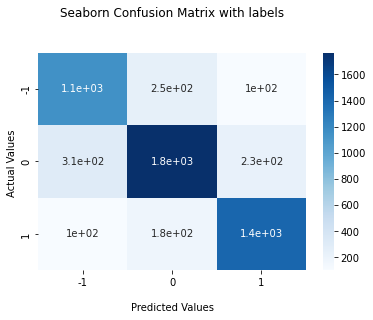

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['-1','0','1'])
ax.yaxis.set_ticklabels(['-1','0', '1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [76]:
from sklearn.metrics import f1_score
f1_score(actual, predicted, average='weighted')

0.787123461476388

In [ ]:
#Running the model on API and exporting tweet, sentiment to csv

In [80]:
res=clf.predict(ltest)

In [78]:
live

,selected_text
0,[@MrAnderson_13 yeah why not]
1,"[out now let’s roll \n\nhttps, //t.co/LSsz7LvRDs]"
2,[@guitaromantics ur welcome]
3,[the caucasian james silly shirt collection dr...
4,[just another reminder that this is my summer]
5,"[we did it https, //t.co/HJqX1Ck4Dg]"
6,[@theantedwards_ @netflix @juanchiviris41 osca...
7,[@WillyTrillEra it’s no secret that i’m attrac...
8,"[incredibly dedicated sibling https, //t.co/u7..."
9,[tasted excellent btw]


In [79]:
tweetlist

[['@MrAnderson_13 yeah why not'],
 ['out now let’s roll \n\nhttps', '//t.co/LSsz7LvRDs'],
 ['@guitaromantics ur welcome'],
 ['the caucasian james silly shirt collection drops tomorrow at noon CT https',
  '//t.co/Ct7Ue9iZjl'],
 ['just another reminder that this is my summer'],
 ['we did it https', '//t.co/HJqX1Ck4Dg'],
 ['@theantedwards_ @netflix @juanchiviris41 oscar incoming'],
 ['@WillyTrillEra it’s no secret that i’m attractive and wanted by thousands of women'],
 ['incredibly dedicated sibling https', '//t.co/u7UQy0mi98'],
 ['tasted excellent btw'],
 ['chipotle worker said he put his heart and soul into the steak and wanted me to try it so he gave me a sample. i would like to nominate him for dude of the week https',
  '//t.co/XmERko9FBW'],
 ['@jaredmfier @devdevdevawn we don’t need anymore because we already have u'],
 ['@kristoferthomas my buddy did a presentation in college on how smoking weed is actually good for u. eye opening. let me send it to u'],
 ['@hanachandeluxe i supp

In [81]:
CNB_Tf=pd.DataFrame({'selected_text': tweetlist,'sentiment':res})
CNB_Tf.to_csv('CNB_Tf.csv')